# IPL 2024 Analysis

In [19]:
import pandas as pd

# Load the datasets with unique variable names
ipl_data_2024 = pd.read_csv("/content/ipl_2024_deliveries.csv")

# Display basic info
ipl_data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17053 non-null  int64  
 1   season            17053 non-null  int64  
 2   match_no          17053 non-null  int64  
 3   date              17053 non-null  object 
 4   venue             17053 non-null  object 
 5   batting_team      17053 non-null  object 
 6   bowling_team      17053 non-null  object 
 7   innings           17053 non-null  int64  
 8   over              17053 non-null  float64
 9   striker           17053 non-null  object 
 10  bowler            17053 non-null  object 
 11  runs_of_bat       17053 non-null  int64  
 12  extras            17053 non-null  int64  
 13  wide              17053 non-null  int64  
 14  legbyes           17053 non-null  int64  
 15  byes              17053 non-null  int64  
 16  noballs           17053 non-null  int64 

## Data Analysis for IPL 2022, 2023, and 2024

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import os

In [21]:
ipl_data_2024 = pd.read_csv('/content/ipl_2024_deliveries.csv')
ipl_data_2024.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,NaN,NaN,NaN
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,NaN,NaN,NaN
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN


In [22]:
ipl_data_2024['total_runs'] = ipl_data_2024['runs_of_bat'] + ipl_data_2024['extras']

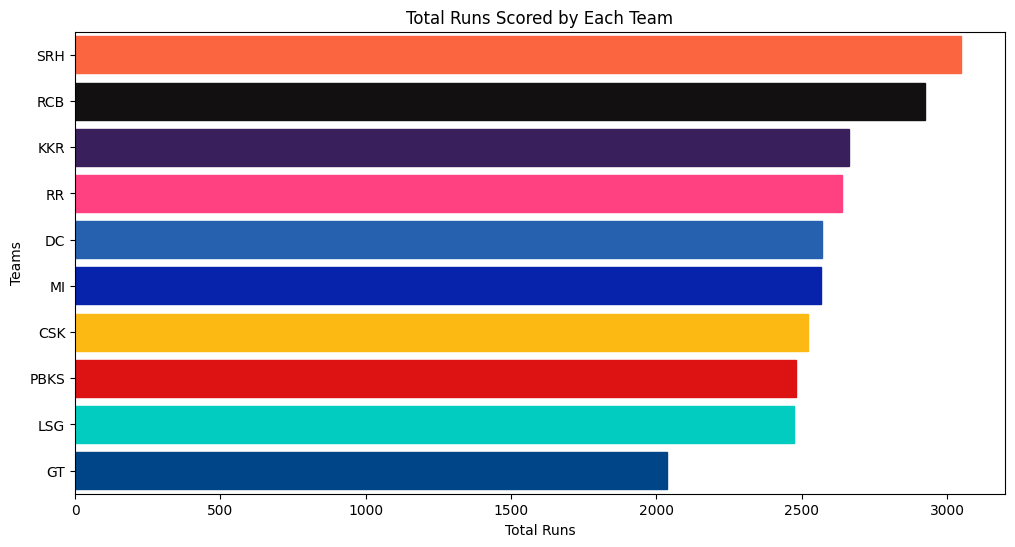

In [23]:
team_runs = ipl_data_2024.groupby('batting_team')['total_runs'].sum().reset_index()

team_runs = team_runs.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='total_runs', y='batting_team', data=team_runs)

def teamclr(bars,criterion):
    for bar, team in zip(bars.patches, criterion):
        if team == 'SRH':
            bar.set_color('#fb653f')
        elif team == 'RCB':
            bar.set_color('#121010')
        elif team == 'CSK':
            bar.set_color('#fdb913')
        elif team == 'MI':
            bar.set_color('#0722ab')
        elif team == 'KKR':
            bar.set_color('#391F5C')
        elif team == 'PBKS':
            bar.set_color('#dd1212')
        elif team == 'RR':
            bar.set_color('#FF4081')
        elif team == 'GT':
            bar.set_color('#004587')
        elif team == 'LSG':
            bar.set_color('#02ccbf')
        elif team == 'DC':
            bar.set_color('#2561AE')

teamclr(bars,team_runs['batting_team'])
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.show()

<ipython-input-24-e1902765f194>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='batting_team', y='average_batting_runs_per_innings', data=team_batting_avg_runs, palette='viridis')


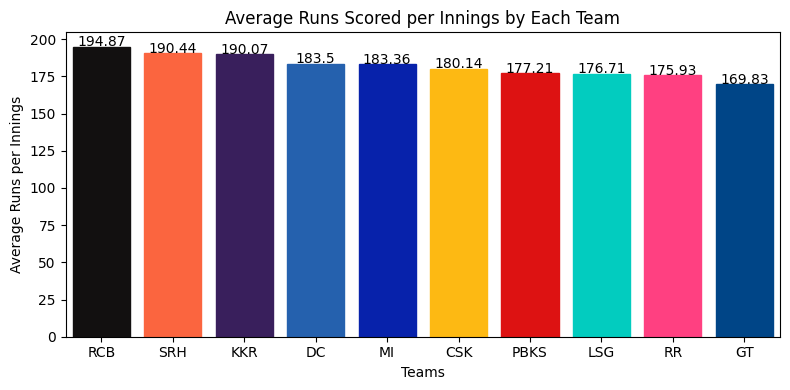

In [24]:
team_match_runs = ipl_data_2024.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts = team_match_runs['batting_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts.columns = ['batting_team', 'innings']

# Calculate total runs for each team
total_batting_team_runs = team_match_runs.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_batting_avg_runs = pd.merge(total_batting_team_runs, innings_counts, on='batting_team')

# Calculate average runs per innings
team_batting_avg_runs['average_batting_runs_per_innings'] = team_batting_avg_runs['total_runs'] / team_batting_avg_runs['innings']

# Sort by average runs per innings
team_batting_avg_runs = team_batting_avg_runs.sort_values(by='average_batting_runs_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='batting_team', y='average_batting_runs_per_innings', data=team_batting_avg_runs, palette='viridis')
teamclr(bars, team_batting_avg_runs['batting_team'])

# Adding values on top of the bars
for bar, value in zip(bars.patches, team_batting_avg_runs['average_batting_runs_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2),
              ha='center', color='black', fontsize=10)

teamclr(bars,team_batting_avg_runs['average_batting_runs_per_innings'])
plt.title('Average Runs Scored per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs per Innings')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

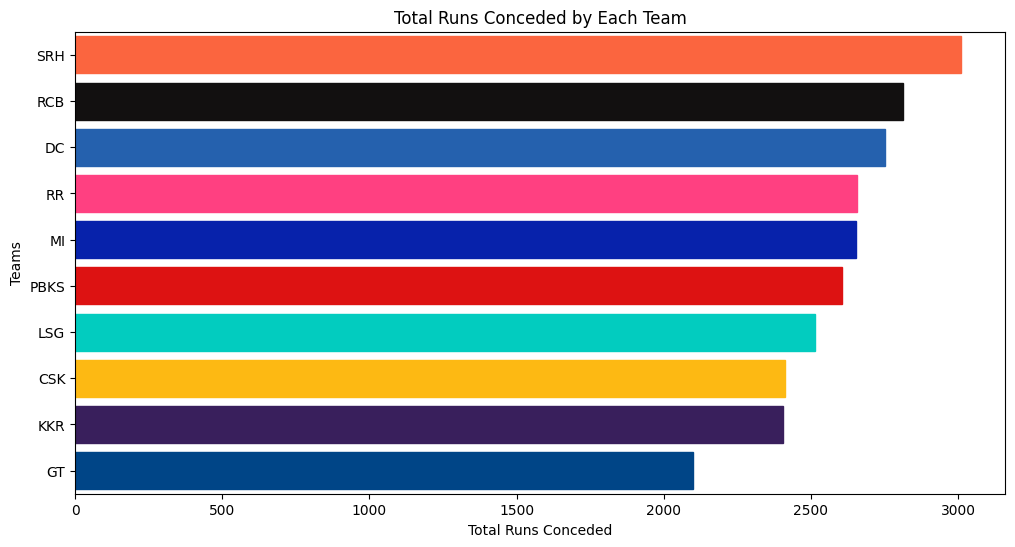

In [25]:
team_runs_conceded = ipl_data_2024.groupby('bowling_team')['total_runs'].sum().reset_index()

team_runs_conceded = team_runs_conceded.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='total_runs', y='bowling_team', data=team_runs_conceded)

teamclr(bars,team_runs_conceded['bowling_team'])
plt.title('Total Runs Conceded by Each Team')
plt.xlabel('Total Runs Conceded')
plt.ylabel('Teams')
plt.show()

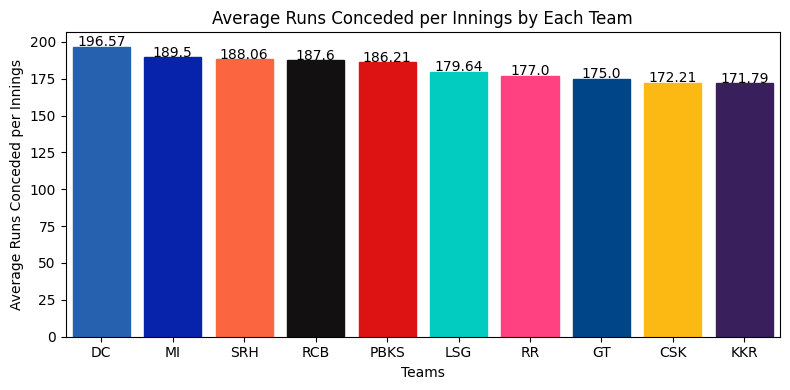

In [26]:
team_runs_conceded = ipl_data_2024.groupby(['match_id', 'bowling_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts1 = team_runs_conceded['bowling_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts1.columns = ['bowling_team', 'innings']

# Calculate total runs for each team
total_team_runs_conceded = team_runs_conceded.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_avg_runs_conceded = pd.merge(total_team_runs_conceded, innings_counts1, on='bowling_team')

# Calculate average runs per innings
team_avg_runs_conceded['average_runs_conceded_per_innings'] = team_avg_runs_conceded['total_runs'] / team_avg_runs_conceded['innings']

# Sort by average runs per innings
team_avg_runs_conceded = team_avg_runs_conceded.sort_values(by='average_runs_conceded_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='bowling_team', y='average_runs_conceded_per_innings', data=team_avg_runs_conceded)
teamclr(bars, team_avg_runs_conceded['bowling_team'])

# Adding values on top of the bars
for bar, value in zip(bars.patches, team_avg_runs_conceded['average_runs_conceded_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2),
              ha='center', color='black', fontsize=10)

teamclr(bars,team_avg_runs_conceded['average_runs_conceded_per_innings'])
plt.title('Average Runs Conceded per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs Conceded per Innings')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

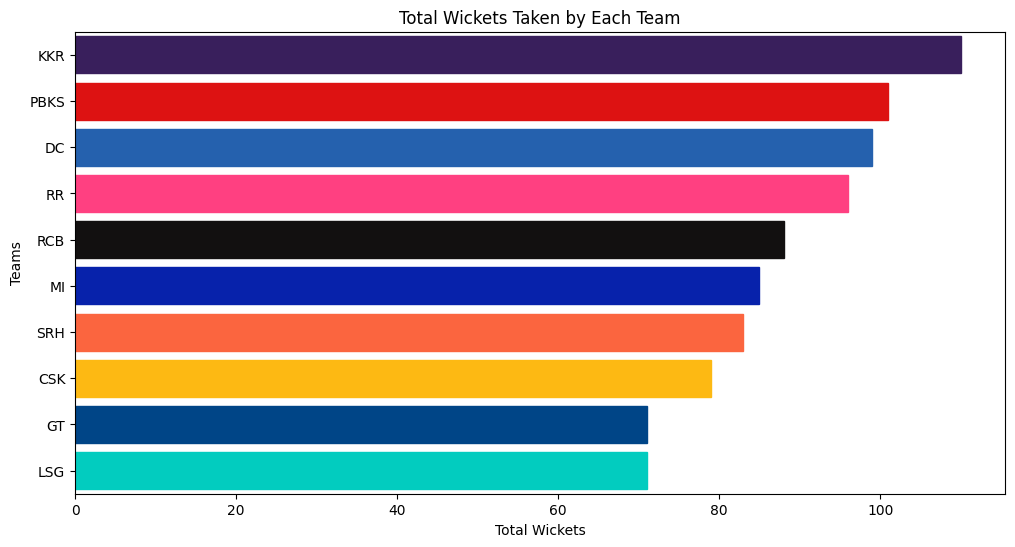

In [27]:
# Filter only wicket deliveries
wickets = ipl_data_2024[ipl_data_2024['wicket_type'].notnull()]

# Group by 'bowling_team' and count the 'dismissal_kind'
team_wickets = wickets.groupby('bowling_team')['wicket_type'].count().reset_index()

# Sort by wickets
team_wickets = team_wickets.sort_values(by='wicket_type', ascending=False)

# Plotting the total wickets taken by each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='wicket_type', y='bowling_team', data=team_wickets)
teamclr(bars,team_wickets['bowling_team'])
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Total Wickets')
plt.ylabel('Teams')
plt.show()

In [28]:
import math
ipl_data_2024['over_'] = ipl_data_2024['over'].map(lambda x: math.ceil(x))

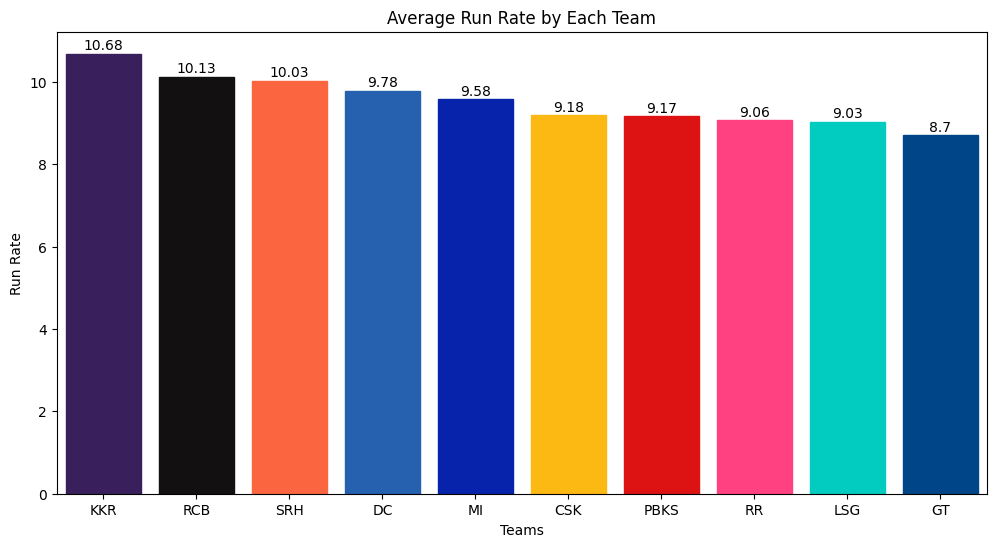

In [29]:
# Filter out wide and no-ball deliveries
legal_deliveries = ipl_data_2024[(ipl_data_2024['noballs'] == 0) & (ipl_data_2024['wide'] == 0)]

# Count the number of legal deliveries faced by each team
balls_faced = legal_deliveries.groupby('batting_team').size().reset_index(name='balls_faced')

# Calculate total runs scored by each team
total_runs = ipl_data_2024.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_faced, total_runs, on='batting_team')

# Calculate overs faced
team_stats['overs_faced'] = team_stats['balls_faced'] / 6

# Calculate run rate
team_stats['run_rate'] = team_stats['total_runs'] / team_stats['overs_faced']

# Sort by run rate
team_stats = team_stats.sort_values(by='run_rate', ascending=False)
# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='batting_team', y='run_rate', data=team_stats)
teamclr(bars, team_stats['batting_team'])
for bar, value in zip(bars.patches, team_stats['run_rate']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2),
              ha='center', color='black', fontsize=10)

plt.title('Average Run Rate by Each Team')
plt.xlabel('Teams')
plt.ylabel('Run Rate')
plt.show()

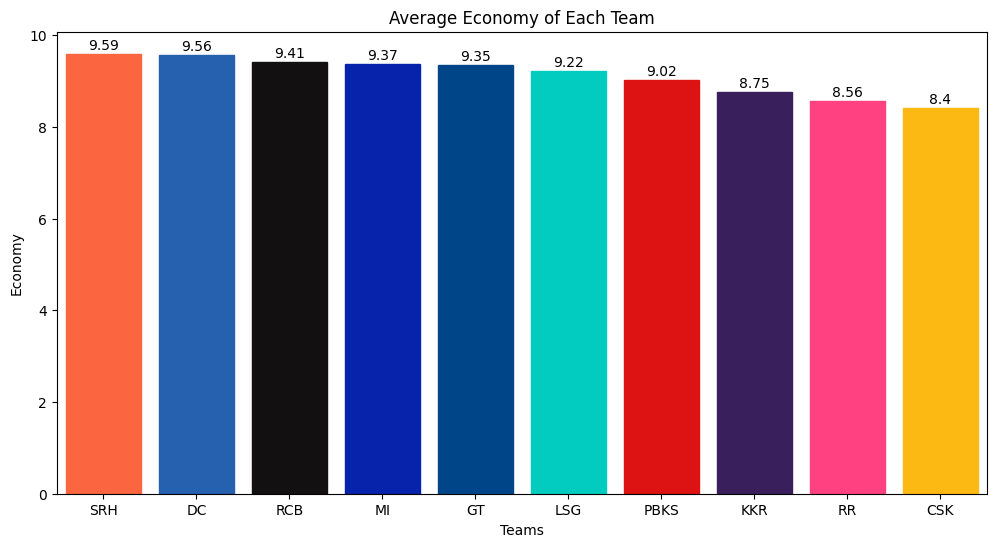

In [30]:
# Count the number of deliveries bowled by each team
balls_bowled = ipl_data_2024.groupby('bowling_team').size().reset_index(name='balls_bowled')

# Calculate total runs conceded by each team
total_runs = ipl_data_2024.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_bowled, total_runs, on='bowling_team')

# Calculate overs faced
team_stats['overs_bowled'] = team_stats['balls_bowled'] / 6

# Calculate run rate
team_stats['economy'] = team_stats['total_runs'] / team_stats['overs_bowled']

# Sort by run rate
team_stats = team_stats.sort_values(by='economy', ascending=False)
# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='bowling_team', y='economy', data=team_stats)
teamclr(bars, team_stats['bowling_team'])
for bar, value in zip(bars.patches, team_stats['economy']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2),
              ha='center', color='black', fontsize=10)

plt.title('Average Economy of Each Team')
plt.xlabel('Teams')
plt.ylabel('Economy')
plt.show()

In [31]:
top_run_scorer = ipl_data_2024.groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer['Avg'] = round(top_run_scorer['Runs'] / top_run_scorer['Inns'], 2)
top_run_scorer.index += 1
top_run_scorer[:20]

,striker,Team,Inns,Runs,SR,Avg
1,Kohli,RCB,15,741,149.40,49.40
2,Gaikwad,CSK,14,583,137.18,41.64
3,Riyan Parag,RR,14,573,141.13,40.93
4,Head,SRH,15,567,185.29,37.80
5,Samson,RR,15,531,147.09,35.40
6,Sai Sudharsan,GT,12,527,136.18,43.92
7,Rahul,LSG,14,520,130.65,37.14
8,Pooran,LSG,14,499,169.73,35.64
9,Narine,KKR,14,488,168.28,34.86
10,Abhishek Sharma,SRH,16,484,195.16,30.25


<ipython-input-32-b60a1c443faf>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen, palette='Spectral')


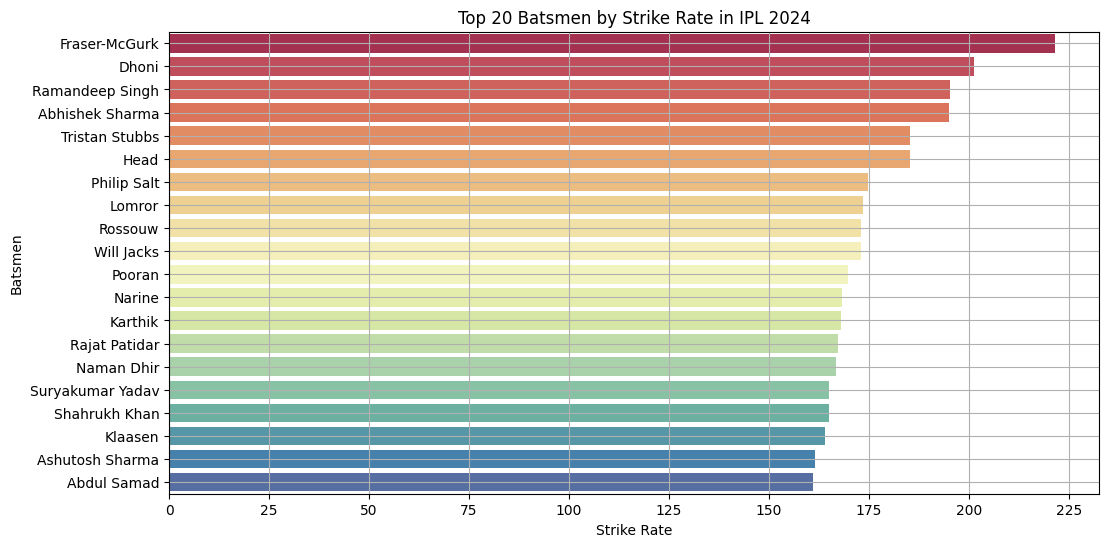

In [32]:
batsman_runs = ipl_data_2024.groupby('striker')['runs_of_bat'].sum().reset_index()

# Calculate balls faced by each batsman
balls_faced = ipl_data_2024.groupby('striker')['match_id'].count().reset_index()
balls_faced.columns = ['striker', 'balls_faced']

# Merge batsman runs and balls faced
batsman_strike_rate = pd.merge(batsman_runs, balls_faced, on='striker')

# Calculate strike rate
batsman_strike_rate['strike_rate'] = round((batsman_strike_rate['runs_of_bat'] / batsman_strike_rate['balls_faced']) * 100,2)

# Sort by strike rate and take top 20
top_strike_rate_batsmen = batsman_strike_rate[batsman_strike_rate['runs_of_bat'] > 100].sort_values(by='strike_rate', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen, palette='Spectral')
plt.xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225])  # Set custom tick marks
plt.grid()
plt.title('Top 20 Batsmen by Strike Rate in IPL 2024')
plt.xlabel('Strike Rate')
plt.ylabel('Batsmen')
plt.show()

In [33]:
top_striker = ipl_data_2024.groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_striker = top_striker[top_striker['Runs'] > 100].reset_index()
top_striker.index += 1
top_striker[:20]

,striker,Team,Inns,Runs,SR
1,Fraser-McGurk,DC,9,330,221.48
2,Dhoni,CSK,11,161,201.25
3,Ramandeep Singh,KKR,9,125,195.31
4,Abhishek Sharma,SRH,16,484,195.16
5,Head,SRH,15,567,185.29
6,Tristan Stubbs,DC,13,378,185.29
7,Philip Salt,KKR,12,435,174.70
8,Lomror,RCB,10,125,173.61
9,Rossouw,PBKS,8,211,172.95
10,Will Jacks,RCB,8,230,172.93


In [34]:
top_wicket_takers = ipl_data_2024.loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers.index += 1
top_wicket_takers.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Harshal Patel,PBKS,14,24,9.304918
2,Chakaravarthy,KKR,14,21,7.986885
3,Bumrah,MI,13,20,6.260870
4,Avesh Khan,RR,15,20,9.266272
5,T Natarajan,SRH,14,19,8.547692
6,Harshit Rana,KKR,11,19,8.781609
7,Arshdeep Singh,PBKS,14,19,9.501577
8,Russell,KKR,14,19,9.854749
9,Cummins,SRH,16,18,9.104558
10,Chahal,RR,15,18,9.108635


In [35]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2024.groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2024.loc[(ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
13,Bumrah,328,54.666667,336,6.146341,20,16.400000
57,Narine,334,55.666667,368,6.610778,17,19.647059
45,Mayank Yadav,76,12.666667,85,6.710526,7,10.857143
37,Livingstone,75,12.500000,84,6.720000,3,25.000000
63,Pathirana,144,24.000000,168,7.000000,13,11.076923
88,Theekshana,121,20.166667,144,7.140496,2,60.500000
33,Krunal Pandya,205,34.166667,255,7.463415,6,34.166667
9,Axar,265,44.166667,337,7.630189,11,24.090909
28,Jadeja,285,47.500000,369,7.768421,8,35.625000
16,Chakaravarthy,309,51.500000,406,7.883495,21,14.714286


<ipython-input-36-78f7803659fe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='average', y='batting_team', data=merged_data1, palette='plasma')


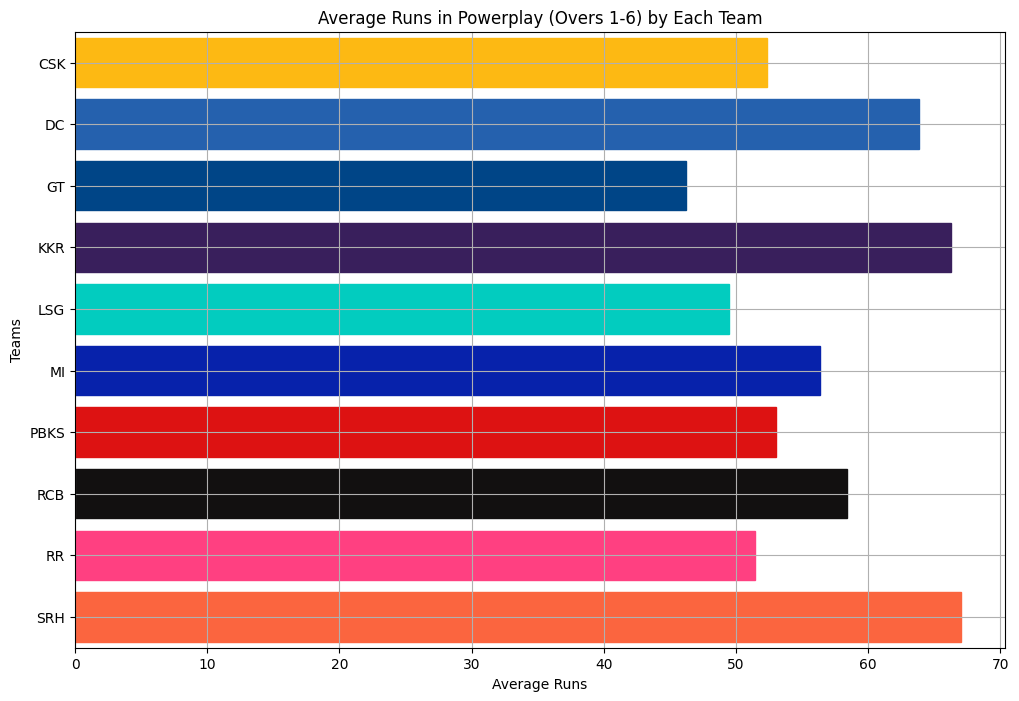

In [36]:
# Filter data for powerplay overs (1-6)
powerplay_data = ipl_data_2024[ipl_data_2024['over'] <= 6]

# Group by 'batting_team' and sum the 'total_runs'
powerplay_runs = powerplay_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data1 = pd.merge(powerplay_runs, innings_counts, on='batting_team')

merged_data1['average'] = merged_data1['total_runs'] / merged_data1['innings']
# Plotting the total runs scored by each team in powerplay
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='average', y='batting_team', data=merged_data1, palette='plasma')
teamclr(bars, merged_data1['batting_team'])
plt.title('Average Runs in Powerplay (Overs 1-6) by Each Team')
plt.xticks([i for i in range(0,80,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

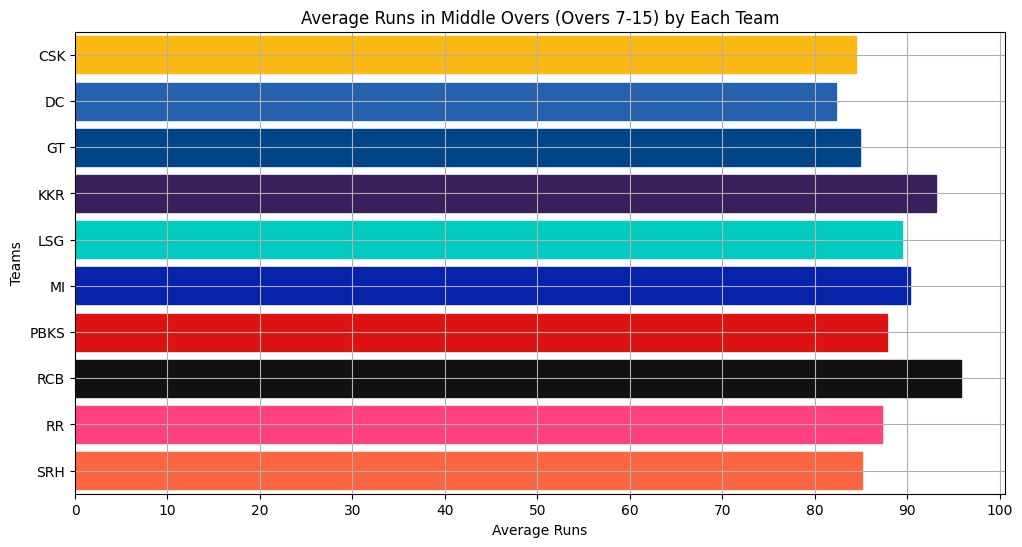

In [37]:
# Filter data for middle overs (7-15)
middle_overs_data = ipl_data_2024[(ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] <= 16)]

# Group by 'batting_team' and sum the 'total_runs'
middle_overs_runs = middle_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data2 = pd.merge(middle_overs_runs, innings_counts, on='batting_team')

merged_data2['average'] = merged_data2['total_runs'] / merged_data2['innings']# Plotting the total runs scored by each team in middle overs

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='average', y='batting_team', data=merged_data2)
teamclr(bars, merged_data2['batting_team'])
plt.title('Average Runs in Middle Overs (Overs 7-15) by Each Team')
plt.xticks([i for i in range(0,110,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

<ipython-input-38-506ead271792>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='average', y='batting_team', data=merged_data3, palette='coolwarm')


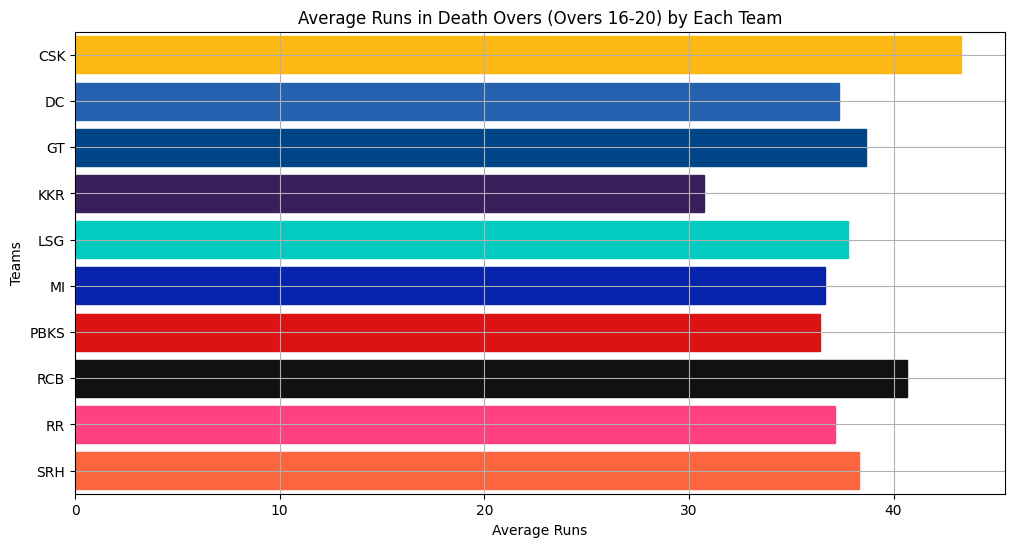

In [38]:
# Filter data for death overs (16-20)
death_overs_data = ipl_data_2024[ipl_data_2024['over'] >= 16]

# Group by 'batting_team' and sum the 'total_runs'
death_overs_runs = death_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data3 = pd.merge(death_overs_runs, innings_counts, on='batting_team')

merged_data3['average'] = merged_data3['total_runs'] / merged_data3['innings']

# Plotting the total runs scored by each team in death overs
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='average', y='batting_team', data=merged_data3, palette='coolwarm')
teamclr(bars, merged_data3['batting_team'])
plt.title('Average Runs in Death Overs (Overs 16-20) by Each Team')
plt.xticks([i for i in range(0,50,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

In [39]:
top_run_scorer_powerplay = ipl_data_2024[ipl_data_2024['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_powerplay.index += 1
top_run_scorer_powerplay[:20]

,striker,Team,Inns,Runs,SR
1,Head,SRH,15,402,207.22
2,Kohli,RCB,15,373,156.07
3,Abhishek Sharma,SRH,16,343,191.62
4,du Plessis,RCB,15,309,156.06
5,Philip Salt,KKR,12,296,176.19
6,Jaiswal,RR,15,282,150.80
7,Narine,KKR,14,281,163.37
8,Rahul,LSG,14,273,126.39
9,Rohit,MI,14,269,143.85
10,Fraser-McGurk,DC,9,266,239.64


In [40]:
top_sr_powerplay = ipl_data_2024[ipl_data_2024['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_powerplay = top_sr_powerplay[top_sr_powerplay['Runs'] > 50].reset_index()
top_sr_powerplay.index += 1
top_sr_powerplay[:20]

,striker,Team,Inns,Runs,SR
1,Fraser-McGurk,DC,9,266,239.64
2,Venkatesh Iyer,KKR,6,111,217.65
3,Head,SRH,15,402,207.22
4,Abhishek Sharma,SRH,16,343,191.62
5,Philip Salt,KKR,12,296,176.19
6,Rossouw,PBKS,6,82,174.47
7,Narine,KKR,14,281,163.37
8,Rajat Patidar,RCB,7,63,161.54
9,Prabhsimran,PBKS,13,236,158.39
10,Ishan Kishan,MI,13,239,156.21


In [41]:
top_wicket_takers_powerplay = ipl_data_2024[ipl_data_2024['over'] < 6].loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_powerplay.index += 1
top_wicket_takers_powerplay.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Boult,RR,15,12,6.965217
2,Starc,KKR,13,11,9.573770
3,Bhuvneshwar,SRH,16,10,8.297872
4,Vaibhav Arora,KKR,10,9,8.025000
5,Khaleel Ahmed,DC,14,8,8.698413
6,Arshdeep Singh,PBKS,14,7,8.566265
7,Ishant,DC,9,7,8.608696
8,Bumrah,MI,13,6,5.727273
9,Tushar Deshpande,CSK,13,6,8.200000
10,N Thushara,MI,7,6,9.000000


In [42]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2024[ipl_data_2024['over'] < 6].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2024[ipl_data_2024['over'] < 6].loc[(ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) &(ipl_data_2024['over'] < 6)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
10,Bumrah,134,22.333333,126,5.641791,6,22.333333
9,Boult,234,39.000000,267,6.846154,12,19.500000
46,Sandeep Sharma,91,15.166667,114,7.516484,4,22.750000
58,Vaibhav Arora,162,27.000000,214,7.925926,9,18.000000
54,T Natarajan,103,17.166667,137,7.980583,4,25.750000
56,Tushar Deshpande,154,25.666667,205,7.987013,6,25.666667
8,Bhuvneshwar,243,40.500000,325,8.024691,10,24.300000
11,Chahar,126,21.000000,169,8.047619,5,25.200000
34,Mustafizur,75,12.500000,101,8.080000,3,25.000000
41,Rabada,124,20.666667,170,8.225806,4,31.000000


In [43]:
top_run_scorer_midovers = ipl_data_2024[(ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] < 16)].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_midovers.index += 1
top_run_scorer_midovers[:20]

,striker,Team,Inns,Runs,SR
1,Riyan Parag,RR,14,431,139.03
2,Tilak Varma,MI,12,334,152.51
3,Sai Sudharsan,GT,10,330,148.65
4,Pant,DC,13,328,139.57
5,Rajat Patidar,RCB,12,318,170.97
6,Kohli,RCB,11,314,140.81
7,Samson,RR,11,302,141.78
8,Pooran,LSG,14,297,165.00
9,Klaasen,SRH,14,297,142.11
10,Shivam Dube,CSK,14,280,148.15


In [44]:
top_sr_midovers = ipl_data_2024[(ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] < 16)].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_midovers = top_sr_midovers[top_sr_midovers['Runs'] > 100].reset_index()
top_sr_midovers.index += 1
top_sr_midovers[:20]

,striker,Team,Inns,Runs,SR
1,Abhishek Sharma,SRH,7,141,204.35
2,Will Jacks,RCB,6,157,186.90
3,Narine,KKR,8,198,180.00
4,Rossouw,PBKS,5,127,176.39
5,Philip Salt,KKR,5,139,171.60
6,Rajat Patidar,RCB,12,318,170.97
7,du Plessis,RCB,4,127,169.33
8,Pooran,LSG,14,297,165.00
9,Suryakumar Yadav,MI,8,238,164.14
10,Bairstow,PBKS,5,121,161.33


In [45]:
top_wicket_takers_midovers = ipl_data_2024[(ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] < 16)].loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_midovers.index += 1
top_wicket_takers_midovers.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Chakaravarthy,KKR,14,19,7.610895
2,Chahal,RR,15,16,8.833333
3,Narine,KKR,14,14,6.197080
4,Kuldeep Yadav,DC,11,13,7.703057
5,Russell,KKR,13,13,10.044444
6,Chawla,MI,11,10,8.557377
7,Pathirana,CSK,6,9,6.275862
8,Axar,DC,13,9,7.137931
9,Harshit Rana,KKR,10,9,7.747573
10,Cummins,SRH,14,9,7.829268


In [46]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2024[(ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] < 16)].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2024[(ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] < 16)].loc[(ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2024['over'] > 6) & (ipl_data_2024['over'] < 16)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
62,Sandeep Sharma,66,11.000000,66,6.000000,2,33.000000
47,Narine,279,46.500000,283,6.086022,14,19.928571
53,Pathirana,88,14.666667,91,6.204545,9,9.777778
36,Mayank Yadav,63,10.500000,66,6.285714,5,12.600000
31,Livingstone,69,11.500000,77,6.695652,3,23.000000
28,Krunal Pandya,155,25.833333,173,6.696774,6,25.833333
10,Bumrah,103,17.166667,120,6.990291,4,25.750000
8,Axar,235,39.166667,276,7.046809,9,26.111111
75,Theekshana,72,12.000000,85,7.083333,2,36.000000
78,Tushar Deshpande,65,10.833333,77,7.107692,3,21.666667


In [47]:
top_run_scorer_death = ipl_data_2024[ipl_data_2024['over'] > 16].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_death.index += 1
top_run_scorer_death[:20]

,striker,Team,Inns,Runs,SR
1,Tristan Stubbs,DC,7,223,293.42
2,Karthik,RCB,12,201,189.62
3,Tim David,MI,10,171,174.49
4,Pooran,LSG,9,170,165.05
5,Klaasen,SRH,7,169,225.33
6,Dhoni,CSK,11,154,202.63
7,Rahul Tewatia,GT,7,128,166.23
8,Ayush Badoni,LSG,8,120,160.00
9,Shashank Singh,PBKS,7,116,227.45
10,Shivam Dube,CSK,8,116,165.71


In [48]:
top_sr_death = ipl_data_2024[ipl_data_2024['over'] > 16].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_death = top_sr_death[top_sr_death['Runs'] > 100].reset_index()
top_sr_death.index += 1
top_sr_death[:20]

,striker,Team,Inns,Runs,SR
1,Tristan Stubbs,DC,7,223,293.42
2,Shashank Singh,PBKS,7,116,227.45
3,Klaasen,SRH,7,169,225.33
4,Dhoni,CSK,11,154,202.63
5,Karthik,RCB,12,201,189.62
6,Ashutosh Sharma,PBKS,6,112,180.65
7,Jadeja,CSK,8,113,176.56
8,Tim David,MI,10,171,174.49
9,Rahul Tewatia,GT,7,128,166.23
10,Shivam Dube,CSK,8,116,165.71


In [49]:
top_wicket_takers_death = ipl_data_2024[ipl_data_2024['over'] > 16].loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_death.index += 1
top_wicket_takers_death.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Harshal Patel,PBKS,11,14,10.470588
2,T Natarajan,SRH,12,11,9.495146
3,Bumrah,MI,11,10,6.136364
4,Arshdeep Singh,PBKS,12,9,11.106383
5,Avesh Khan,RR,13,8,8.921739
6,Tushar Deshpande,CSK,9,8,9.724138
7,Mukesh Kumar,DC,10,8,11.454545
8,Mustafizur,CSK,9,7,9.937500
9,Sandeep Sharma,RR,10,7,10.129870
10,Mohit Sharma,GT,9,7,11.195876


In [50]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2024[ipl_data_2024['over'] > 16].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2024[ipl_data_2024['over'] > 16].loc[(ipl_data_2024['byes'] == 0) & (ipl_data_2024['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2024['wicket_type'].isin(['runout','retired out','retired hurt'])) &(ipl_data_2024['over'] > 16)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
5,Bumrah,91,15.166667,90,5.934066,10,9.100000
43,Siraj,95,15.833333,124,7.831579,5,19.000000
2,Avesh Khan,120,20.000000,173,8.650000,8,15.000000
16,Harshit Rana,72,12.000000,110,9.166667,6,12.000000
49,Tushar Deshpande,90,15.000000,141,9.400000,8,11.250000
46,T Natarajan,104,17.333333,163,9.403846,11,9.454545
25,Mustafizur,100,16.666667,159,9.540000,7,14.285714
29,Naveen-ul-Haq,81,13.500000,129,9.555556,5,16.200000
54,Yash Dayal,84,14.000000,134,9.571429,6,14.000000
15,Harshal Patel,112,18.666667,181,9.696429,14,8.000000
